## Libraries import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Dataset Diabetes import

In [2]:
diabetes = pd.read_csv('./SRC/diabetes.tab.txt', sep="	")
diabetes = diabetes.reindex()

Columns rename

In [3]:
diabetes.columns = ['age', 'sex', 'bmi', 'blood_pression', 'cholesterol', 'ldl', 'hdl','tch','ltg','blood_sugar','Y']

### Some plots

<AxesSubplot:xlabel='bmi', ylabel='cholesterol'>

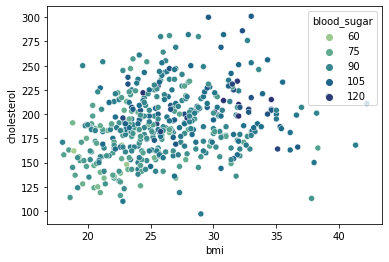

In [4]:
sb.scatterplot(data=diabetes, x='bmi', y='cholesterol', hue='blood_sugar', palette="crest")

<AxesSubplot:xlabel='age', ylabel='cholesterol'>

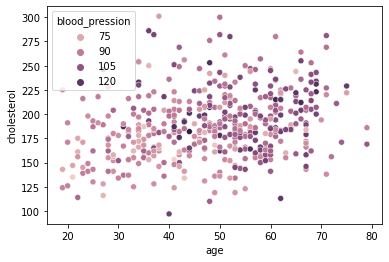

In [5]:
sb.scatterplot(data=diabetes, x='age', y='cholesterol', hue='blood_pression')

<AxesSubplot:xlabel='hdl', ylabel='cholesterol'>

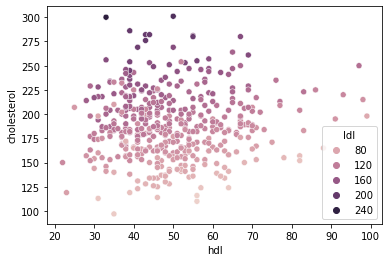

In [6]:
sb.scatterplot(data=diabetes, x='hdl', y='cholesterol', hue='ldl')

<p>Only with the plot, even a little scattered, we can identify some points:
<p> -Blood sugar is higher in individuals with higher cholesterol and bmi
<p> -Over the years, blood pressure and cholesterol problems appear more often
<p> -Cholesterol is directly related to ldl, but inversely to hdl

## Diabetes dataset analysis

Create dataset describe

In [7]:
describe = diabetes.describe(percentiles=[])
describe = describe.drop(index='count')
describe = describe.rename(index={'50%':'median'})
describe

,age,sex,bmi,blood_pression,cholesterol,ldl,hdl,tch,ltg,blood_sugar,Y
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
median,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### Outliers remove

In [8]:
from scipy import stats
describe_no_outliers = diabetes[(np.abs(stats.zscore(diabetes)) < 3).all(axis=1)].describe(percentiles=[])
describe_no_outliers = describe_no_outliers.drop(index='count')
describe_no_outliers = describe_no_outliers.rename(index={'50%':'median'})
describe_no_outliers

,age,sex,bmi,blood_pression,cholesterol,ldl,hdl,tch,ltg,blood_sugar,Y
mean,48.504651,1.469767,26.289302,94.674372,188.025581,114.847209,49.477907,4.043395,4.634329,91.102326,151.393023
std,13.203578,0.499667,4.281714,13.767554,33.803033,29.473002,11.969857,1.218012,0.519470,11.491712,76.278513
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
median,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.605200,91.000000,140.000000
max,79.000000,2.000000,39.100000,133.000000,286.000000,199.400000,88.000000,7.900000,6.107000,124.000000,341.000000


## New database

In [9]:
titanic = pd.read_csv('./SRC/titanic.csv')

### Name of peoples over 27 years old who survived

In [10]:
names = []
for i in titanic['Name'][(titanic['Age']>27) & (titanic['Survived']==1)].values:
    names.append(i)
names[:5]
    

['Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Bonnell, Miss. Elizabeth',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Beesley, Mr. Lawrence']

### Categorizing ages

In [11]:
for i in range(len(titanic)):
    if titanic['Age'][i] < 19:
        titanic['Age'].iloc[i] = 'Kid'
    elif titanic['Age'][i] < 61:
        titanic['Age'].iloc[i] = 'Adult'
    else:
        titanic['Age'].iloc[i] = 'Elderly'

/home/geovane/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,NaN,S


## Merge

Writing in column of the Diabetes dataset 

In [13]:
dataset = []
for i in range(len(diabetes)):
    dataset.append('DIABETES')
diabetes['DATASET'] = dataset

Writing in column of the Titanic dataset 

In [14]:
dataset = []
for i in range(len(titanic)):
    dataset.append('TITANIC')
titanic['DATASET'] = dataset

In [15]:
merge = diabetes.merge(titanic, on='DATASET', how='outer')

In [16]:
print(merge['DATASET'].head())
print(merge['DATASET'].tail())

0    DIABETES
1    DIABETES
2    DIABETES
3    DIABETES
4    DIABETES
Name: DATASET, dtype: object
1328    TITANIC
1329    TITANIC
1330    TITANIC
1331    TITANIC
1332    TITANIC
Name: DATASET, dtype: object
